array([ 1.00000000e+00, -3.07465790e-01,  1.25049709e-01,  1.69814671e-01,
        6.22690613e-02,  1.69614930e-02,  8.38680120e-02,  3.45875691e-04,
        8.99865232e-02,  3.38483620e-02, -4.59666184e-02, -7.85687039e-03,
        1.92039148e-02, -1.19350055e-01,  1.23941113e-01, -1.27883675e-01,
       -3.71499800e-02,  8.86787796e-02, -6.56807252e-02,  2.59863781e-02,
        1.70874735e-02,  4.35375501e-02, -1.66137092e-01,  2.28148740e-01,
       -2.28052344e-01,  8.85634755e-03,  9.06052637e-02, -4.38882231e-02,
       -5.71274067e-02,  1.56842973e-02,  4.88349957e-03, -1.61397061e-02,
       -1.88706546e-02, -8.35187336e-03, -1.77328718e-04,  1.28180245e-01,
       -2.11985770e-01,  2.04234626e-01, -8.46964969e-02,  8.39408123e-02,
        4.99165480e-03,  2.34647054e-02,  9.49256017e-03,  4.02149024e-02,
       -2.14599312e-02, -5.47212641e-02,  1.51937951e-01, -3.66193978e-02,
       -1.03862943e-01,  1.83447498e-01, -1.33932544e-01, -3.66124181e-02,
        4.23701937e-02, -

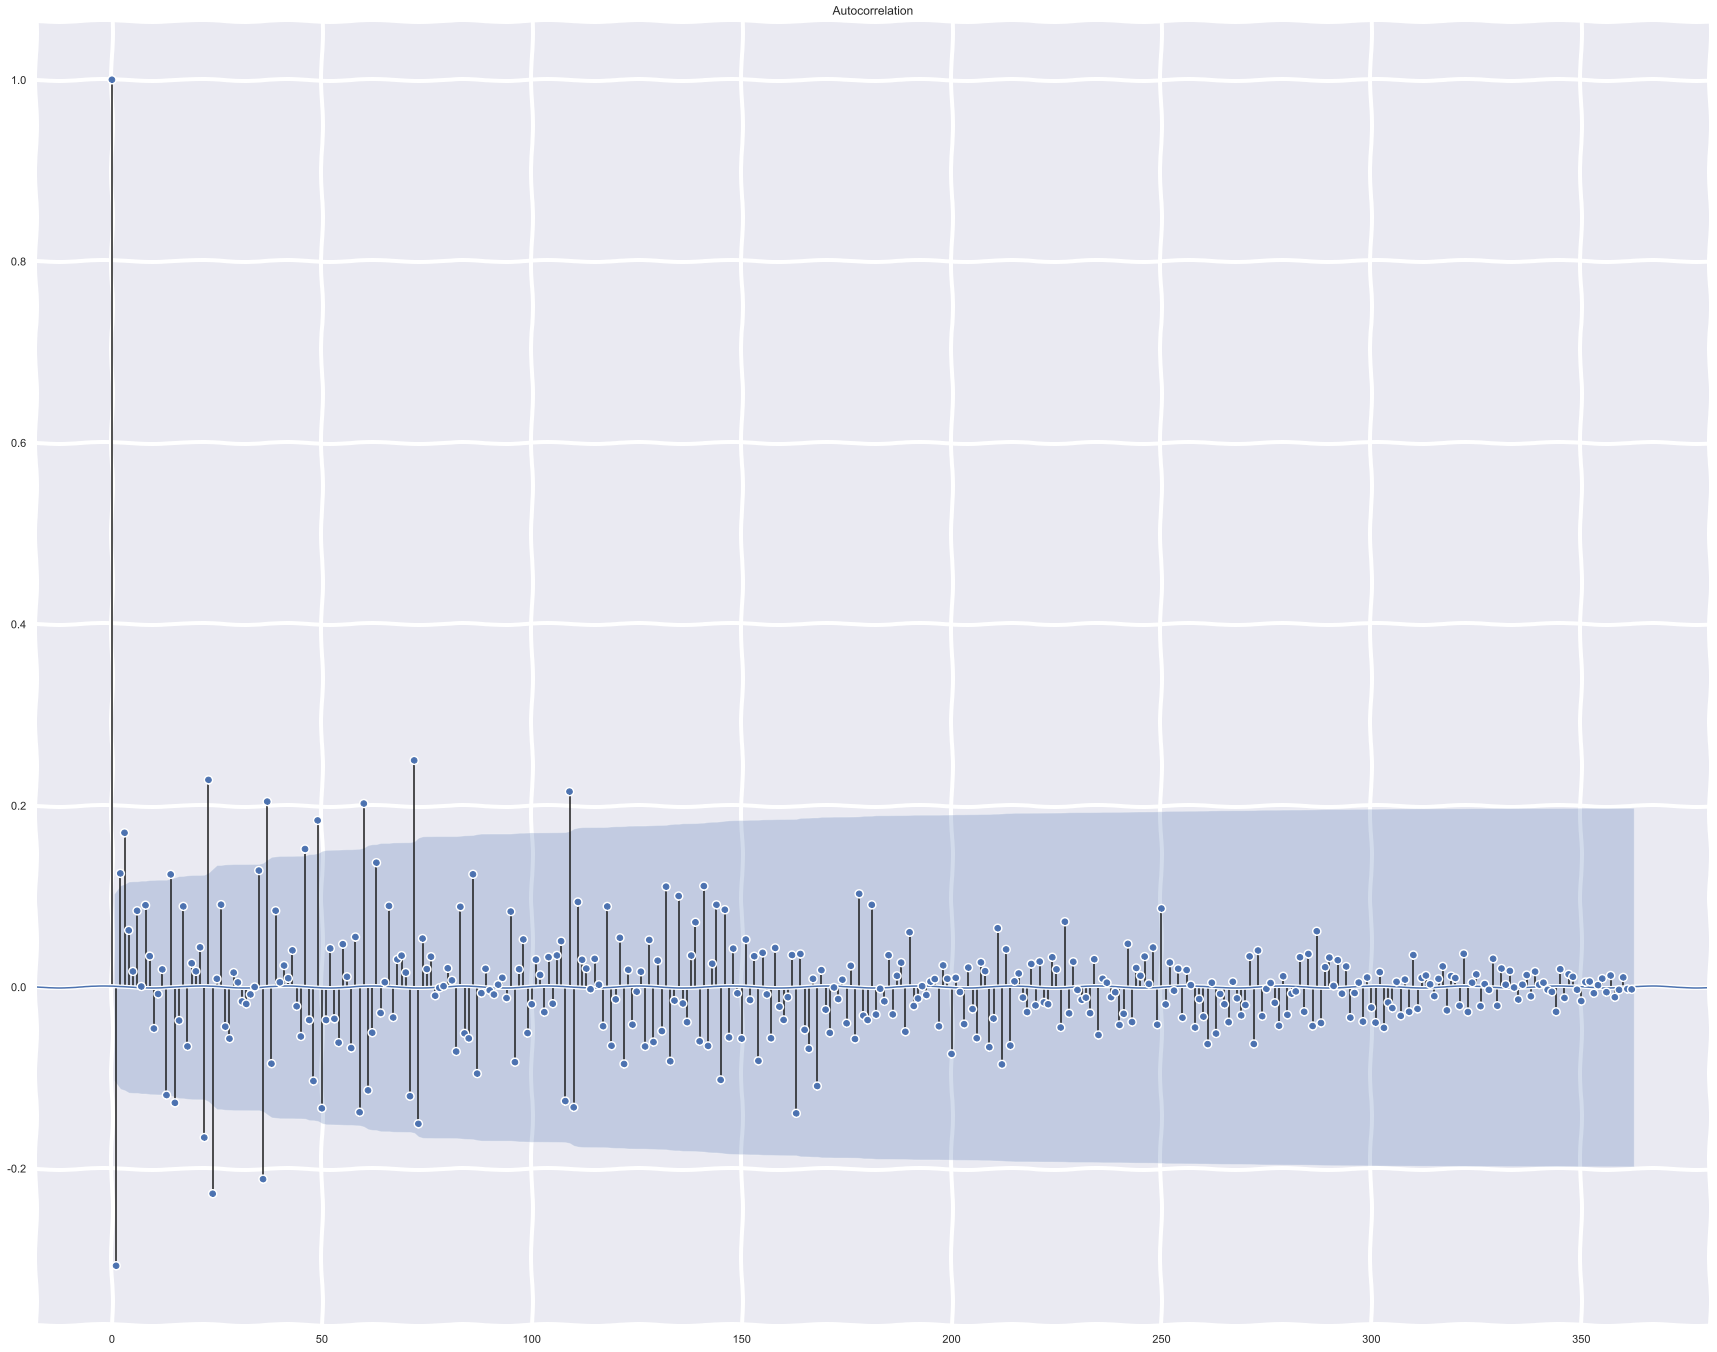

In [246]:
# 基本のライブラリを読み込む
import numpy as np  #numpy:数値計算用の拡張モジュール
import pandas as pd #pandas:数表および時系列データ用のライブラリ
from scipy import stats
import statsmodels.api as sm #statsmodels:統計モデルの推定だけでなく、統計的検定を実施できるライブラリ


# グラフ描画
from matplotlib import pylab as plt #matplotlib:グラフ描画用ライブラリ
import seaborn as sns #seaborn:グラフ描画用ライブラリ
%matplotlib inline  #グラフをインラインで表示（別ウィンドウにしない）
sns.set()

# グラフを横長にする
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 30, 24 #グラフサイズ変更

# 普通にデータを読み込む
dt = pd.read_csv("economicdata.csv",   #ディレクトリはjupyter notebookの場所がデフォルト
                 encoding="SHIFT_JIS", #指定しないと読み込めないことがある様子
                 index_col=0,          #１列目をindexにする　indexはlist配列の中での要素が何番目にあるかを示す数値。for文のrange関数でループ
                 parse_dates=True,     #indexの列をdatetime型にする　（参考）https://qiita.com/sakabe/items/ae1fa47a58c796006627
                 dtype='float64')      #index以外を浮動小数点に　計算で誤差が発生することを前提とした数値データ↔︎固定小数点 https://qiita.com/siruku6/items/27dd9fb84aa84186eda5
dt.head()

iip = dt['indprod_2'] #dtのうち'indprod_2'列をiipと名付ける
#iip.index = dt[[0]]
iip = iip.dropna() # Nanデータ削除（重要）
#arr_iip = np.array(iip) #iipをarrayに

#print(iip) #数値、データ型の出力
#print(iip.index) #iipのindexの出力
#print(arr_iip)

#plt.plot(iip)　#プロット

#valid = ~np.isnan(iip).any(axis=0)　#計算されるが、結果が違う（動きは同じで桁が違う）
#def autocorr_naive_nan(arr_iip):
#    N = len(arr_iip)
#    return np.array([np.nanmean(arr_iip[iSh:] * arr_iip[:N-iSh]) for iSh in range(N)])
#aut_iip = autocorr_naive_nan(arr_iip)
#print(aut_iip)
#%matplotlib inline
#import matplotlib.pyplot as plt
#plt.stem(np.arange(364), aut_iip, use_line_collection=True)

import statsmodels.graphics.api as smg
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(iip, lags=362);

iip_acf = sm.tsa.stattools.acf(iip,nlags=363,fft=False)
iip_acf #nanがたくさん

#iip.autocorr(lag=1) #単独の相関係数が出力される

#np.corrcoef(iip[1:-1], iip[4:]) #2*2の相関係数が出力される

#auto_series = [iip.autocorr(lag=i) for i in range(363)] #自己相関係数がたくさん。１行目にNanがあっても計算される？
#acorr_data = np.asarray(auto_series) #arrayにする
#print(acorr_data)
#%matplotlib inline
#import matplotlib.pyplot as plt
#plt.stem(np.arange(363), acorr_data, use_line_collection=True)

#plt.plot(auto_series)
#from pandas.plotting import autocorrelation_plot
#autocorrelation_plot(pd.Series(auto_series))

#fig = plt.figure(figsize=(10, 10))
#ax = fig.add_subplot(2, 1, 1, title="周期性のあるデータ")
#ax.plot(iip.index, iip)
#ax = fig.add_subplot(2, 1, 2, title="自己相関係数")
#ax.bar(range(3363), auto_series)
#plt.show()